In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def get_json(data_file):
    with open(data_file) as data_file:
        data = json.load(data_file)

    dict1 = [{
        'name': str(x['updatedRm']['index']) + '-' + str(x['updatedRm']['name']),
        'totalError': x['totalError'],
        'hf': x['hf'],
        'refHf': x['updatedRm']['datum'][0],
        'ie': x['ie'],
        'refIe': x['updatedRm']['datum'][2],
        'dipole': x['dipole'],
        'refDipole': x['updatedRm']['datum'][1],
        'geomError': x['geomGradMag'],
        'hasGeom': 'expGeom' in x['updatedRm']
    } for x in data['results']]

    return pd.DataFrame(dict1);


datafiles = ["run0.json", "chnof-du1-justgradient.json", "chnof-du1-justqa.json", "chnof-du1-rfo.json"]
dfs = [get_json(x) for x in datafiles]
dfs

[               name   totalError          hf  refHf         ie  refIe  \
 0              0-H1  1523.010021  326.674239  365.7  -0.000000    0.0   
 1              1-H1     0.000004   52.102000   52.1  11.906276    0.0   
 2              2-H2   822.581718    0.718497    0.0  15.747221   15.4   
 3              3-C1  1696.853124  389.407123  430.6  18.695558    0.0   
 4              4-C1     0.000100  170.890000  170.9   9.475558    0.0   
 ...             ...          ...         ...    ...        ...    ...   
 1201  1201-H6C7O4F6  1663.469889 -419.714342 -460.5  12.276649    0.0   
 1202     1202-C6F10  1504.725274 -423.109211 -461.9  12.139606    0.0   
 1203   1203-C5N1F11  1764.236307 -436.897187 -478.9  13.345950    0.0   
 1204   1204-C2N5F11     0.909032  -85.353432  -84.4  12.806914    0.0   
 1205     1205-C6F12  4618.110013 -522.543323 -590.5  13.397135    0.0   
 
             dipole  refDipole  geomError  hasGeom  
 0     0.000000e+00        0.0   0.000000    False  
 1  

In [2]:
datanames = ["original", "gradient", "qa", "rfo"]

for i in range(len(dfs)):
    df = dfs[i]
    df["hfError"] = df["hf"] - df["refHf"]
    df["refIe"] = df["refIe"][df["refIe"] != 0]
    df["ieError"] = df["ie"] - df["refIe"]
    df["refDipole"] = df["refDipole"][df["refDipole"] != 0]
    df["dipoleError"] = df["dipole"] - df["refDipole"]
    df["geomError"] = df["geomError"][df["hasGeom"] == True]
    df["optMethod"] = datanames[i]

dfs[0].drop('hasGeom',1).drop('optMethod',1).to_csv('run0.csv')

C:\Users\billi\AppData\Local\Temp/ipykernel_11824/3764784518.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfs[0].drop('hasGeom',1).drop('optMethod',1).to_csv('run0.csv')


In [3]:
f = 0.9
outliers = dfs[3][dfs[3].totalError > dfs[3].totalError.quantile(f)]
wellbehaving = dfs[3][dfs[3].totalError < dfs[3].totalError.quantile(f)]
orig_outliers = dfs[0][dfs[0].totalError > dfs[0].totalError.quantile(f)]
orig_wb = dfs[0][dfs[0].totalError < dfs[0].totalError.quantile(f)]

osorted = outliers.sort_values(by='totalError', ascending=False)
osorted.to_csv('outliers.csv')
osorted

,name,totalError,hf,refHf,ie,refIe,dipole,refDipole,geomError,hasGeom,hfError,ieError,dipoleError,optMethod
874,874-O3,20092.960484,24.617633,34.1,12.637991,12.75,1.202682e+00,0.53,199.101935,True,-9.482367,-0.112009,0.672682,rfo
712,712-O2,19533.008004,-27.817831,0.0,12.011798,NaN,1.501008e-14,NaN,193.696548,True,-27.817831,NaN,NaN,rfo
711,711-O2,18726.634530,0.323142,22.0,10.798429,NaN,4.401473e-15,NaN,191.085051,True,-21.676858,NaN,NaN,rfo
1134,1134-O2F1,17787.640020,-55.386945,3.0,12.024399,NaN,5.395908e-03,NaN,169.579507,True,-58.386945,NaN,NaN,rfo
1168,1168-C2N1F3,13419.464877,-118.432299,-118.4,15.010812,NaN,9.467326e-01,1.26,163.586119,True,-0.032299,NaN,-0.313267,rfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1170-N1O1F3,1261.097018,-14.903828,-39.0,14.133707,NaN,3.220993e-01,NaN,36.890962,True,24.096172,NaN,NaN,rfo
633,633-H18C9O1,1244.228994,-47.826370,-83.1,10.448018,NaN,2.261175e+00,NaN,NaN,False,35.273630,NaN,NaN,rfo
1165,1165-H3C2F3,1240.853526,-182.406442,-178.9,14.593033,13.80,3.498482e+00,2.32,34.932524,True,-3.506442,0.793033,1.178482,rfo
743,743-H8C4O2,1237.417590,-104.714098,-106.5,11.327322,NaN,1.770552e+00,NaN,49.683562,True,1.785902,NaN,NaN,rfo


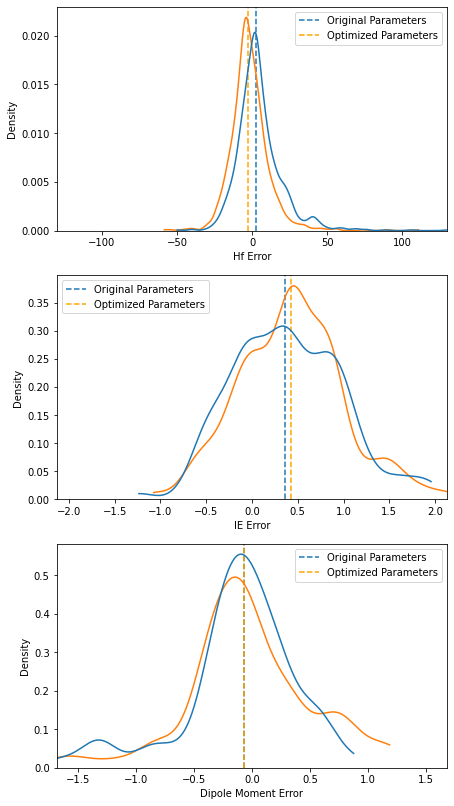

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(7, 14));
axs = axs.flatten()
tgt = dfs[0].append(dfs[3], ignore_index=True);

errorTypes = ["hfError", "ieError", "dipoleError"]
errorTypesNames = ["Hf Error", "IE Error", "Dipole Moment Error"]
for i, e in enumerate(errorTypes):
    axs[i].axvline(dfs[0][e].median(), linestyle='--')
    axs[i].axvline(dfs[3][e].median(), color='orange', linestyle='--')
    n = max(tgt[e].max(), abs(tgt[e].min()))
    axs[i].set_xlim(-n, n)
    sns.kdeplot(data=tgt, x=e, hue="optMethod", gridsize=500, bw_adjust=0.7, cut=0, ax=axs[i])
    axs[i].legend(labels=['Original Parameters', 'Optimized Parameters'])
    axs[i].set_xlabel(errorTypesNames[i])

plt.savefig('error-dist.png', dpi=600)

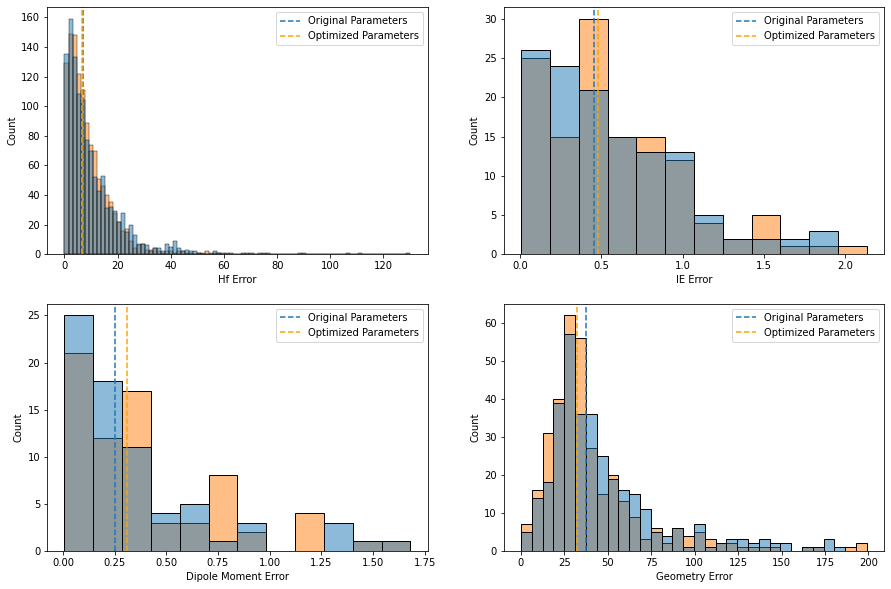

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10));
axs = axs.flatten()

errorTypes = ["hfError", "ieError", "dipoleError", "geomError"]
betterNames2= ['Hf Error', 'IE Error', 'Dipole Moment Error', 'Geometry Error']
for i, e in enumerate(errorTypes):
    axs[i].axvline(dfs[0][e].abs().median(), linestyle='--')
    axs[i].axvline(dfs[3][e].abs().median(), color='orange', linestyle='--')
    sns.histplot(data=tgt, x=tgt[e].abs(), hue="optMethod", ax=axs[i])
    axs[i].set_xlabel(betterNames2[i])
    axs[i].legend(labels=['Original Parameters', 'Optimized Parameters'])

plt.savefig('error-hist.png', dpi=600)

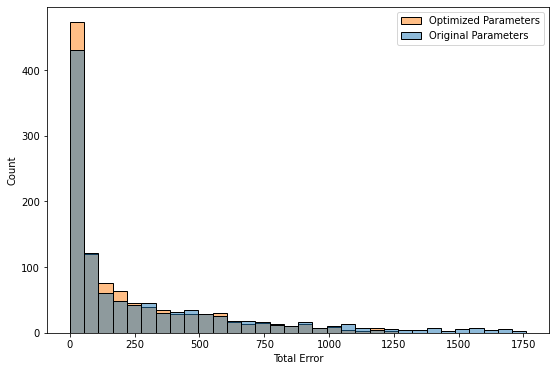

In [6]:
plt.figure(figsize=(9, 6))
ax = sns.histplot(data=orig_wb.append(wellbehaving, ignore_index=True), x='totalError', hue="optMethod")
ax.set_xlabel('Total Error')
plt.legend(labels=['Optimized Parameters', 'Original Parameters'])

plt.savefig('total-error-dist.png', dpi=300)

In [7]:
dfs[3].totalError.describe().to_csv('after-opt.csv')

In [8]:
dfs[0].totalError.describe().apply(lambda x: format(x, 'f')).to_csv('before-opt.csv')

In [9]:
(dfs[3].totalError-dfs[0].totalError).describe().to_csv('before-vs-after.csv')

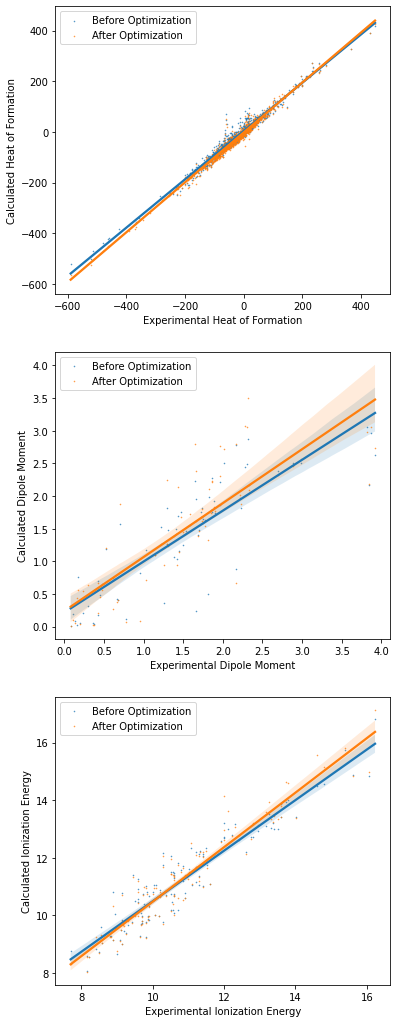

In [10]:
fig, axs = plt.subplots(nrows=3, figsize=(6, 18));
axs = axs.flatten()

betterNames = [('Experimental Heat of Formation', 'Calculated Heat of Formation'),
               ('Experimental Dipole Moment', 'Calculated Dipole Moment'),
               ('Experimental Ionization Energy', 'Calculated Ionization Energy')]
for i, t in enumerate([('refHf', 'hf'), ('refDipole', 'dipole'), ('refIe', 'ie')]):
    sns.regplot(data=dfs[0], x=t[0], y=t[1], ax=axs[i], scatter_kws={'s':0.3},  label='Before Optimization')
    sns.regplot(data=dfs[3], x=t[0], y=t[1], ax=axs[i], scatter_kws={'s':0.3}, label='After Optimization')
    axs[i].legend(loc='upper left')
    axs[i].set(xlabel=betterNames[i][0], ylabel=betterNames[i][1])

plt.savefig('scatter.png', dpi=600)

In [11]:
for et in errorTypes:
    print(et)
    dfs[3][et].describe().to_csv(et + '.csv')

hfError
ieError
dipoleError
geomError


In [12]:
a = []
with open('rfoerrors.csv', 'r') as qcsv:
    for line in qcsv:
        a.append(float(line))
a

[893292.7668360209,
 828165.2274270573,
 828885.1492868514,
 828701.0617478875,
 828825.3337120045,
 828638.2709677772,
 828570.5122107953,
 828778.5039791685,
 733450.701807035,
 726186.4071006813,
 726634.3597201426,
 727669.2097244811,
 728233.0905800306,
 724220.9640878314,
 725449.4089149148,
 726068.8294273162,
 725837.0991036689,
 722569.5531243193,
 723706.2835147105,
 724316.4175571552,
 724323.0074294391,
 724155.6252495296,
 724416.7992082342,
 718284.6779153234,
 720155.8712344862,
 720163.690198611,
 720846.2002955292,
 718009.7817540334,
 717688.6219474126,
 719151.8189528005,
 713598.9784957623,
 715931.2987219078,
 716676.7549133045,
 710557.6667427231,
 712542.740656287,
 712248.977309476,
 712267.6894149836,
 712283.5573227375,
 712836.2097412747,
 712837.9632877698,
 708410.6490226048,
 709936.4609901562,
 709938.1257504886,
 709936.3899524836,
 709933.6892886446,
 709932.1163590953,
 709929.1812987794,
 709953.0630690246,
 709950.7730305997,
 709948.7831165363,
 709

In [13]:
qa = []
with open('qaerrors.csv', 'r') as qcsv:
    for line in qcsv:
        qa.append(float(line))
qa

[893327.7687054755,
 832534.7261484957,
 800163.8657484248,
 752793.3824622852,
 751620.4795216857,
 750939.4474603945,
 748874.5395759623,
 745914.8706868549,
 747514.3637278226,
 745955.1260992291,
 743217.5347412936,
 740795.4944511531,
 742536.3805061273,
 739388.4162102961,
 740499.8077820943,
 734062.9089476609,
 732426.1251588828,
 734525.2001968871,
 731179.5598532818,
 733276.6487709482,
 730112.6967661938,
 732265.8426289052,
 728988.7179449887,
 730691.0152592257,
 725109.6804285294,
 725720.473688757,
 720789.6713213554,
 723126.9564449169,
 719879.1256195607,
 721950.2705518478,
 720005.315862109,
 720205.140057022,
 718238.3048773808,
 719645.6861946181,
 718009.8270625215,
 719315.8342311262,
 717785.00253008,
 718901.8371364822,
 716794.2994889866,
 718051.9968852787,
 715207.461585762,
 716511.7741818054,
 713014.3050866702,
 713735.5583686297,
 710858.2245815132,
 712472.8638693274,
 711754.15089881,
 711893.0683461649,
 710770.90271845,
 711671.3978087599,
 710901.38

In [14]:
ga = []
with open('gradienterrors.csv', 'r') as qcsv:
    for line in qcsv:
        ga.append(float(line))
ga

[891813.0328689626,
 847243.7253314975,
 837684.799883415,
 834642.6030310484,
 832570.0373541152,
 831183.5038718892,
 829578.9282163866,
 828625.2633978646,
 827218.3560954271,
 826468.495134925,
 825197.3759394542,
 824571.0790446337,
 823400.3785202958,
 822855.2842222829,
 821763.80370419,
 821286.2686668634,
 820336.0248237919,
 819917.6750673961,
 819014.9623804962,
 818623.5719364235,
 817760.7471729822,
 817391.0143169888,
 816567.8438909518,
 816215.7856695497,
 815426.459520277,
 815089.4793092132,
 814330.9583390809,
 814007.0607130236,
 813276.698837575,
 812964.1870891094,
 812260.5560274309,
 811958.6376683492,
 811280.2362372555,
 810987.9951629014,
 810332.8958428191,
 810049.493261797,
 809416.5424805809,
 809141.4340678033,
 808528.8230439686,
 808261.4610390062,
 807668.172013378,
 807408.0127563137,
 806833.0549198122,
 806579.6878047356,
 806022.3873776452,
 805775.6536053655,
 805234.9772588,
 804994.3598878126,
 804469.8250332616,
 804235.266776439,
 803724.9353

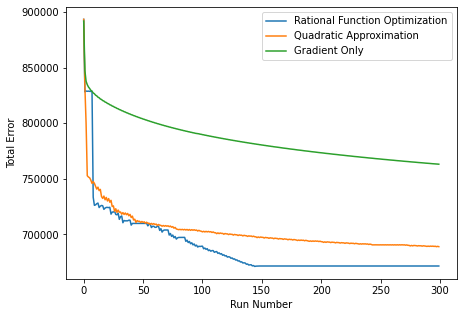

In [21]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(y=a, x=[i for i in range(300)])
sns.lineplot(y=qa, x=[i for i in range(300)], ax=ax)
sns.lineplot(y=ga, x=[i for i in range(300)], ax=ax)
ax.legend(['Rational Function Optimization', 'Quadratic Approximation', 'Gradient Only'])
ax.set_xlabel('Run Number')
ax.set_ylabel('Total Error')

plt.savefig('rforunnum.png', dpi=300)